In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn import svm
import warnings
warnings.filterwarnings("ignore")

In [2]:
path = "./data/ex6data1.mat"
raw_data = loadmat(path)
X = raw_data['X']
y = raw_data['y']

data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
data['y'] = raw_data['y']
data.head()

,X1,X2,y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


In [3]:
X1_p = data[y==1]['X1'].to_numpy()
X2_p = data[y==1]['X2'].to_numpy()

X1_n = data[y==0]['X1'].to_numpy()
X2_n = data[y==0]['X2'].to_numpy()

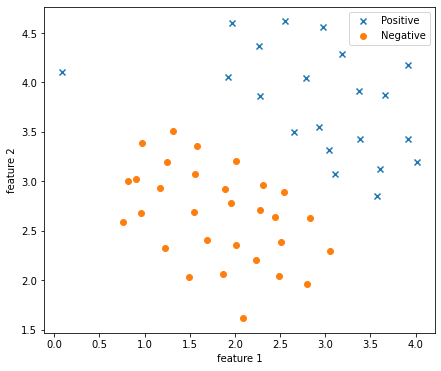

In [4]:
def plot_data(X1_p, X2_p, X1_n, X2_n):
    plt.figure(figsize=(7, 6))
    plt.scatter(X1_p, X2_p, marker='x', label='Positive')
    plt.scatter(X1_n, X2_n, marker='o', label='Negative')
    plt.xlabel('feature 1')
    plt.ylabel('feature 2')
    plt.legend()

plot_data(X1_p, X2_p, X1_n, X2_n)

In [5]:
def plot_boundary(my_svm, xmin, xmax, ymin, ymax):
    x = np.linspace(xmin,xmax,500) # len(x) = N
    y = np.linspace(ymin,ymax,500) # len(y) = M
    z = np.zeros((len(x),len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            z[i][j] = float(my_svm.predict((np.array([x[i],y[j]])).reshape(1, 2)))
  
    z = z.T # 转置，z.shape() = (M, N)
    x, y = np.meshgrid(x, y)
    cs = plt.contour(x, y, z, levels=[0], colors='b')
    plt.title("Decision Boundary")

In [6]:
# 线性可分，c = 1
svc = svm.SVC(C=1,kernel='linear')
svc

SVC(C=1, kernel='linear')

In [7]:
svc.fit(X, y)
svc.score(X, y)

0.9803921568627451

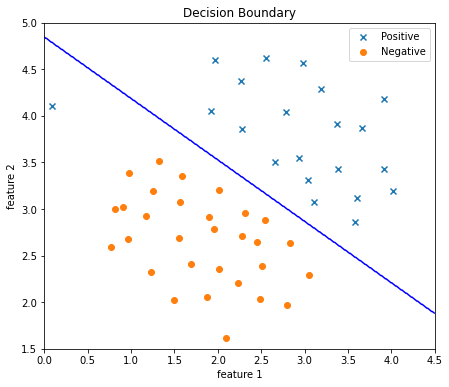

In [8]:
plot_data(X1_p, X2_p, X1_n, X2_n)
plot_boundary(svc, 0, 4.5, 1.5, 5)

In [9]:
# C = 100, high variance
svc2 = svm.SVC(C=100, kernel='linear')
svc2

SVC(C=100, kernel='linear')

In [10]:
svc2.fit(X, y)
svc2.score(X, y)

1.0

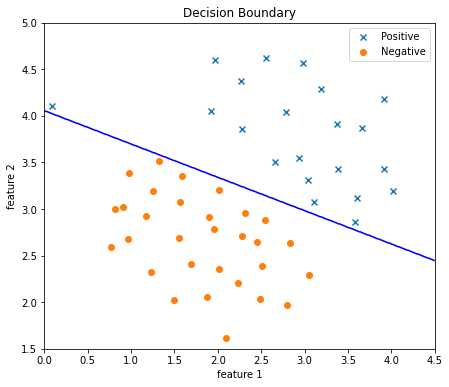

In [11]:
plot_data(X1_p, X2_p, X1_n, X2_n)
plot_boundary(svc2, 0, 4.5, 1.5, 5)

In [12]:
# Example Dataset2 SVM with gaussian kernels

In [13]:
def gaussian_kernel(xi, xj, sigma):
    """gaussian kernel"""
    term = np.sum((xi - xj) ** 2)
    return np.exp(- term / (2 * (sigma ** 2)))

In [14]:
x1 = np.array([1.0, 2.0, 1.0])
x2 = np.array([0, 4.0, -1.0])
sigma = 2
gaussian_kernel(x1, x2, sigma)

0.32465246735834974

In [15]:
path2 = './data/ex6data2.mat'
data2 = loadmat(path2)
X2 = data2['X']
y2 = data2['y']

X2.shape, y2.shape

((863, 2), (863, 1))

In [16]:
X2_pos = np.array([X2[i] for i in range(X2.shape[0]) if y2[i] == 1])
X2_neg = np.array([X2[i] for i in range(X2.shape[0]) if y2[i] == 0])

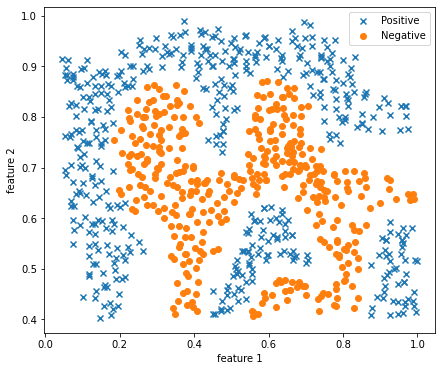

In [17]:
plot_data(X2_pos[:, 0], X2_pos[:, 1], X2_neg[:, 0], X2_neg[:, 1])

In [18]:
C = 1
sigma = 0.1
gamma = np.power(sigma, -2) / 2
gaus_svm = svm.SVC(C=1, kernel='rbf', gamma=gamma)

gaus_svm.fit(X2, y2), gaus_svm.score(X2, y2)

(SVC(C=1, gamma=49.99999999999999), 0.9895712630359212)

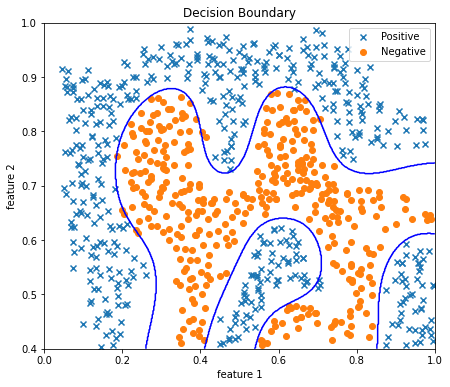

In [19]:
plot_data(X2_pos[:, 0], X2_pos[:, 1], X2_neg[:, 0], X2_neg[:, 1])
plot_boundary(gaus_svm, 0, 1, 0.4, 1)

In [20]:
# Example Dataset 3

In [21]:
path3 = './data/ex6data3.mat'
data3 = loadmat(path3)
X3 = data3['X']
y3 = data3['y']
X3val = data3['Xval']
y3val = data3['yval']
X3.shape, X3val.shape

((211, 2), (200, 2))

In [22]:
X3_pos = np.array([X3[i] for i in range(X3.shape[0]) if y3[i] == 1])
X3_neg = np.array([X3[i] for i in range(X3.shape[0]) if y3[i] == 0])

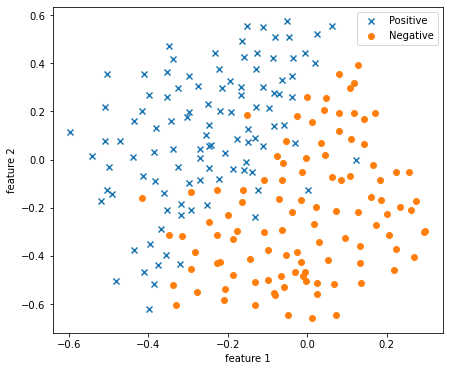

In [23]:
plot_data(X3_pos[:, 0], X3_pos[:, 1], X3_neg[:, 0], X3_neg[:, 1])

In [24]:
def find_params(X, y, Xval, yval):
    """寻找预测准确率最高的C和sigma"""
    C_vec = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
    sigma_vec = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
    best_score = 0
    best_params = [0, 0]
    for C in C_vec:
        for sigmam in sigma_vec:
            gamma = np.power(sigma, -2) / 2
            gaus_svm = svm.SVC(C, kernel='rbf', gamma=gamma)
            gaus_svm.fit(X, y)
            score = gaus_svm.score(Xval, yval)
            if score > best_score:
                best_score = score
                best_params = [C, sigma]    
    return best_params

In [25]:
C, sigma = find_params(X3, y3, X3val, y3val)
C, sigma

(1, 0.1)

In [26]:
gamma = np.power(sigma, -2) / 2
gaus_svm = svm.SVC(C=C, kernel='rbf', gamma=gamma)
gaus_svm.fit(X3, y3), gaus_svm.score(X3, y3)

(SVC(C=1, gamma=49.99999999999999), 0.9478672985781991)

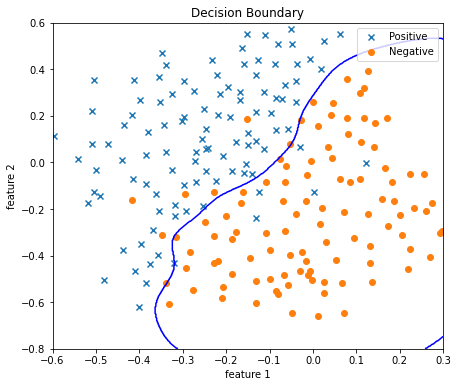

In [27]:
plot_data(X3_pos[:, 0], X3_pos[:, 1], X3_neg[:, 0], X3_neg[:, 1])
plot_boundary(gaus_svm, -0.6, 0.3, -0.8, 0.6)